# Applying the gluing method to R(K4,K6-e)

General procedure: Pick some K shared neighborhood. In our case, this just involves choosing a value for d. Then, iterate through all graphs in R(K3,K6-e,16). For each graph, iterate through each vertex and check if a pointed graph can be constructed. Do this again to pick 2 pointed graphs. At this point, attempt to glue the graphs. From the paper: 
> Note that this consisted of one gluing problem for each
automorphism of K.

In our case, this means considering all d! ways to map an instance of K in the first pointed graph to an instance of K in the second graph.
Repeat for 15, 14, 13, and 12 vertex graphs in R(K3, K6-e). 

Note that for 16 vertices, d >= 5. For 15, d >=4, etc.

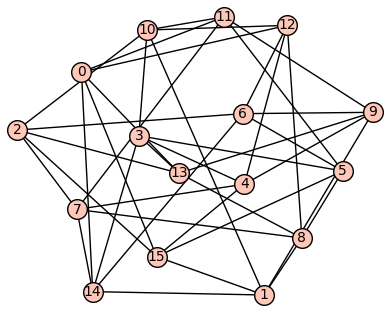

0 0 [11, 12, 13, 14, 15]
0 1 [8, 9, 10, 14, 15]
0 2 [6, 7, 10, 13, 15]
0 3 [4, 5, 10, 13, 14]
0 4 [3, 7, 9, 12, 15]
0 5 [3, 6, 8, 11, 15]
0 6 [2, 5, 9, 12, 14]
0 7 [2, 4, 8, 11, 14]
0 8 [1, 5, 7, 12, 13]
0 9 [1, 4, 6, 11, 13]
0 10 [1, 2, 3, 11, 12]
0 11 [0, 5, 7, 9, 10]
0 12 [0, 4, 6, 8, 10]
0 13 [0, 2, 3, 8, 9]
0 14 [0, 1, 3, 6, 7]
0 15 [0, 1, 2, 4, 5]


In [60]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_16.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        G.show()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i,vertex, possible_K)

There are 16 pointed graphs here. We move onto pointed graphs for 15 vertices.

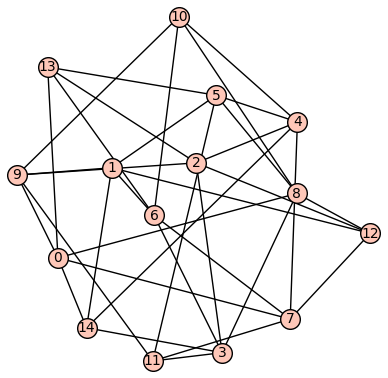

0 0 [7, 8, 9, 13, 14]
0 1 [5, 6, 9, 12, 14]
0 2 [3, 4, 9, 12, 13]
0 3 [2, 6, 8, 11, 14]
0 4 [2, 5, 7, 10, 14]
0 5 [1, 4, 8, 11, 13]
0 6 [1, 3, 7, 10, 13]
0 7 [0, 4, 6, 11, 12]
0 8 [0, 3, 5, 10, 12]
0 9 [0, 1, 2, 10, 11]
0 10 [4, 6, 8, 9]
0 11 [3, 5, 7, 9]
0 12 [1, 2, 7, 8]
0 13 [0, 2, 5, 6]
0 14 [0, 1, 3, 4]


In [61]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_15.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        G.show()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)

There are 15 pointed graphs here. Next we find the pointed graphs for 14.

In [62]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_14.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 3 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)

0 0 [3, 7, 9, 10, 11]
0 1 [2, 6, 8, 10, 11]
0 2 [1, 4, 5, 7, 9]
0 3 [0, 4, 5, 6, 8]
0 4 [2, 3, 11, 13]
0 5 [2, 3, 10, 12]
0 6 [1, 3, 9, 12]
0 7 [0, 2, 8, 12]
0 8 [1, 3, 7, 13]
0 9 [0, 2, 6, 13]
0 10 [0, 1, 5, 13]
0 11 [0, 1, 4, 12]
0 12 [5, 6, 7, 11]
0 13 [4, 8, 9, 10]
1 0 [4, 5, 7, 12, 13]
1 1 [2, 3, 6, 12, 13]
1 2 [1, 5, 7, 10, 11]
1 3 [1, 4, 7, 8, 9]
1 4 [0, 3, 6, 10, 11]
1 5 [0, 2, 6, 8, 9]
1 6 [1, 4, 5, 7]
1 7 [0, 2, 3, 6]
1 8 [3, 5, 11, 13]
1 9 [3, 5, 10, 12]
1 10 [2, 4, 9, 13]
1 11 [2, 4, 8, 12]
1 12 [0, 1, 9, 11]
1 13 [0, 1, 8, 10]
2 0 [4, 5, 10, 11, 13]
2 1 [2, 3, 10, 11, 12]
2 2 [1, 5, 8, 9, 13]
2 3 [1, 4, 6, 7, 13]
2 4 [0, 3, 8, 9, 12]
2 5 [0, 2, 6, 7, 12]
2 6 [3, 5, 9, 11]
2 7 [3, 5, 8, 10]
2 8 [2, 4, 7, 11]
2 9 [2, 4, 6, 10]
2 10 [0, 1, 7, 9]
2 11 [0, 1, 6, 8]
2 12 [1, 4, 5]
2 13 [0, 2, 3]
3 0 [5, 10, 11, 12, 13]
3 1 [4, 8, 9, 12, 13]
3 2 [3, 7, 9, 11, 13]
3 3 [2, 6, 8, 10, 12]
3 4 [1, 6, 7, 10, 11]
3 5 [0, 6, 7, 8, 9]
3 6 [3, 4, 5, 13]
3 7 [2, 4, 5, 12]
3 8 [1, 3, 5, 11]


There are 56 pointed graphs for d=3, d=4, and d=5 for 14 vertices. We then try for 13 vertices.

In [63]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_13.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 2 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 3 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)


0 0 [1, 2, 9, 11, 12]
0 1 [0, 5, 6, 8, 10]
0 2 [0, 3, 4, 7, 10]
0 3 [2, 6, 8, 12]
0 4 [2, 5, 8, 11]
0 5 [1, 4, 7, 12]
0 6 [1, 3, 7, 11]
0 7 [2, 5, 6, 9]
0 8 [1, 3, 4, 9]
0 9 [0, 7, 8, 10]
0 10 [1, 2, 9]
0 11 [0, 4, 6]
0 12 [0, 3, 5]
1 0 [1, 2, 9, 10, 11]
1 1 [0, 6, 7, 8, 12]
1 2 [0, 3, 4, 5, 12]
1 3 [2, 7, 8, 11]
1 4 [2, 6, 8, 10]
1 5 [2, 6, 7, 9]
1 6 [1, 4, 5, 11]
1 7 [1, 3, 5, 10]
1 8 [1, 3, 4, 9]
1 9 [0, 5, 8]
1 10 [0, 4, 7]
1 11 [0, 3, 6]
1 12 [1, 2]
2 0 [1, 3, 4, 9, 12]
2 1 [0, 2, 5, 10, 11]
2 2 [1, 7, 8, 12]
2 3 [0, 6, 8, 11]
2 4 [0, 7, 8, 10]
2 5 [1, 6, 8, 9]
2 6 [3, 5, 10, 12]
2 7 [2, 4, 9, 11]
2 8 [2, 3, 4, 5]
2 9 [0, 5, 7]
2 10 [1, 4, 6]
2 11 [1, 3, 7]
2 12 [0, 2, 6]
3 0 [1, 3, 5, 7, 12]
3 1 [0, 2, 4, 6, 11]
3 2 [1, 7, 9, 10]
3 3 [0, 6, 8, 10]
3 4 [1, 8, 10, 12]
3 5 [0, 9, 10, 11]
3 6 [1, 3, 7, 9]
3 7 [0, 2, 6, 8]
3 8 [3, 4, 7, 11]
3 9 [2, 5, 6, 12]
3 10 [2, 3, 4, 5]
3 11 [1, 5, 8]
3 12 [0, 4, 9]
4 0 [1, 3, 5, 8, 9]
4 1 [0, 2, 4, 6, 7]
4 2 [1, 9, 11, 12]
4 3 [0, 7, 10, 12]
4 

There are 286 graphs for d=2, d=3, d=4, and d=5 for 13 vertices. We then try for 12 vertices.

In [64]:
from sage.graphs.graph_input import from_graph6
with open('dataset_k3kme/k3k6e_12.g6', 'r') as file: # Opens the file, and closes it once we exit this block. 
    graphs = file.readlines() 
    for i in range(len(graphs)):
        G = Graph() # Create an empty graph
        from_graph6(G, graphs[i])
        G = G.complement()
        for vertex in G.vertices():
            possible_K = G.neighbors(vertex)
            if len(possible_K) == 1 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 2 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 3 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 4 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)
            if len(possible_K) == 5 and G.is_independent_set(possible_K):
                print(i, vertex, possible_K)

0 0 [1, 2, 3, 4, 11]
0 1 [0, 6, 9, 10]
0 2 [0, 5, 6, 8]
0 3 [0, 5, 6, 9]
0 4 [0, 7, 8, 10]
0 5 [2, 3, 7, 10]
0 6 [1, 2, 3, 7]
0 7 [4, 5, 6, 11]
0 8 [2, 4, 9]
0 9 [1, 3, 8]
0 10 [1, 4, 5]
0 11 [0, 7]
1 0 [1, 2, 3, 4, 11]
1 1 [0, 6, 9, 10]
1 2 [0, 5, 8, 10]
1 3 [0, 5, 6, 10]
1 4 [0, 7, 8, 9]
1 5 [2, 3, 7, 9]
1 6 [1, 3, 7, 8]
1 7 [4, 5, 6, 11]
1 8 [2, 4, 6]
1 9 [1, 4, 5]
1 10 [1, 2, 3]
1 11 [0, 7]
2 0 [1, 2, 3, 4, 11]
2 1 [0, 7, 9, 10]
2 2 [0, 6, 8, 10]
2 3 [0, 5, 8, 9]
2 4 [0, 5, 6, 7]
2 5 [3, 4, 10, 11]
2 6 [2, 4, 9]
2 7 [1, 4, 8]
2 8 [2, 3, 7]
2 9 [1, 3, 6]
2 10 [1, 2, 5]
2 11 [0, 5]
3 0 [1, 2, 3, 4, 11]
3 1 [0, 8, 9, 10]
3 2 [0, 6, 7, 10]
3 3 [0, 5, 7, 9]
3 4 [0, 5, 6, 8]
3 5 [3, 4, 10]
3 6 [2, 4, 9]
3 7 [2, 3, 8]
3 8 [1, 4, 7]
3 9 [1, 3, 6]
3 10 [1, 2, 5]
3 11 [0]
4 0 [1, 2, 3, 5, 11]
4 1 [0, 4, 6, 7]
4 2 [0, 4, 7, 9]
4 3 [0, 4, 6, 8]
4 4 [1, 2, 3, 10]
4 5 [0, 8, 9, 10]
4 6 [1, 3, 9]
4 7 [1, 2, 8]
4 8 [3, 5, 7]
4 9 [2, 5, 6]
4 10 [4, 5, 11]
4 11 [0, 10]
5 0 [1, 2, 3, 10, 11]
5 1 [0, 

There are 4200 pointed graphs here. 